In [134]:
path = r'C:/Users/ruw/Desktop'
matching_database = "ev391cutoff"
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{path}\RA\penicilin\Libaries')

In [135]:
import results_figures as rfig
import sensitivity as st
import sensitivity_EoL as eol
import sensitvity_countries as stc

In [136]:
import reload_lib as rl
import main as m
rl.reload_lib(m)

Mininum valúe : 0.03770390866715602, Maximum value : 0.14322818512478694
human toxicity potential (HTPc) = 6.811700172713392
human toxicity potential (HTPc) = 0.3142215800323052


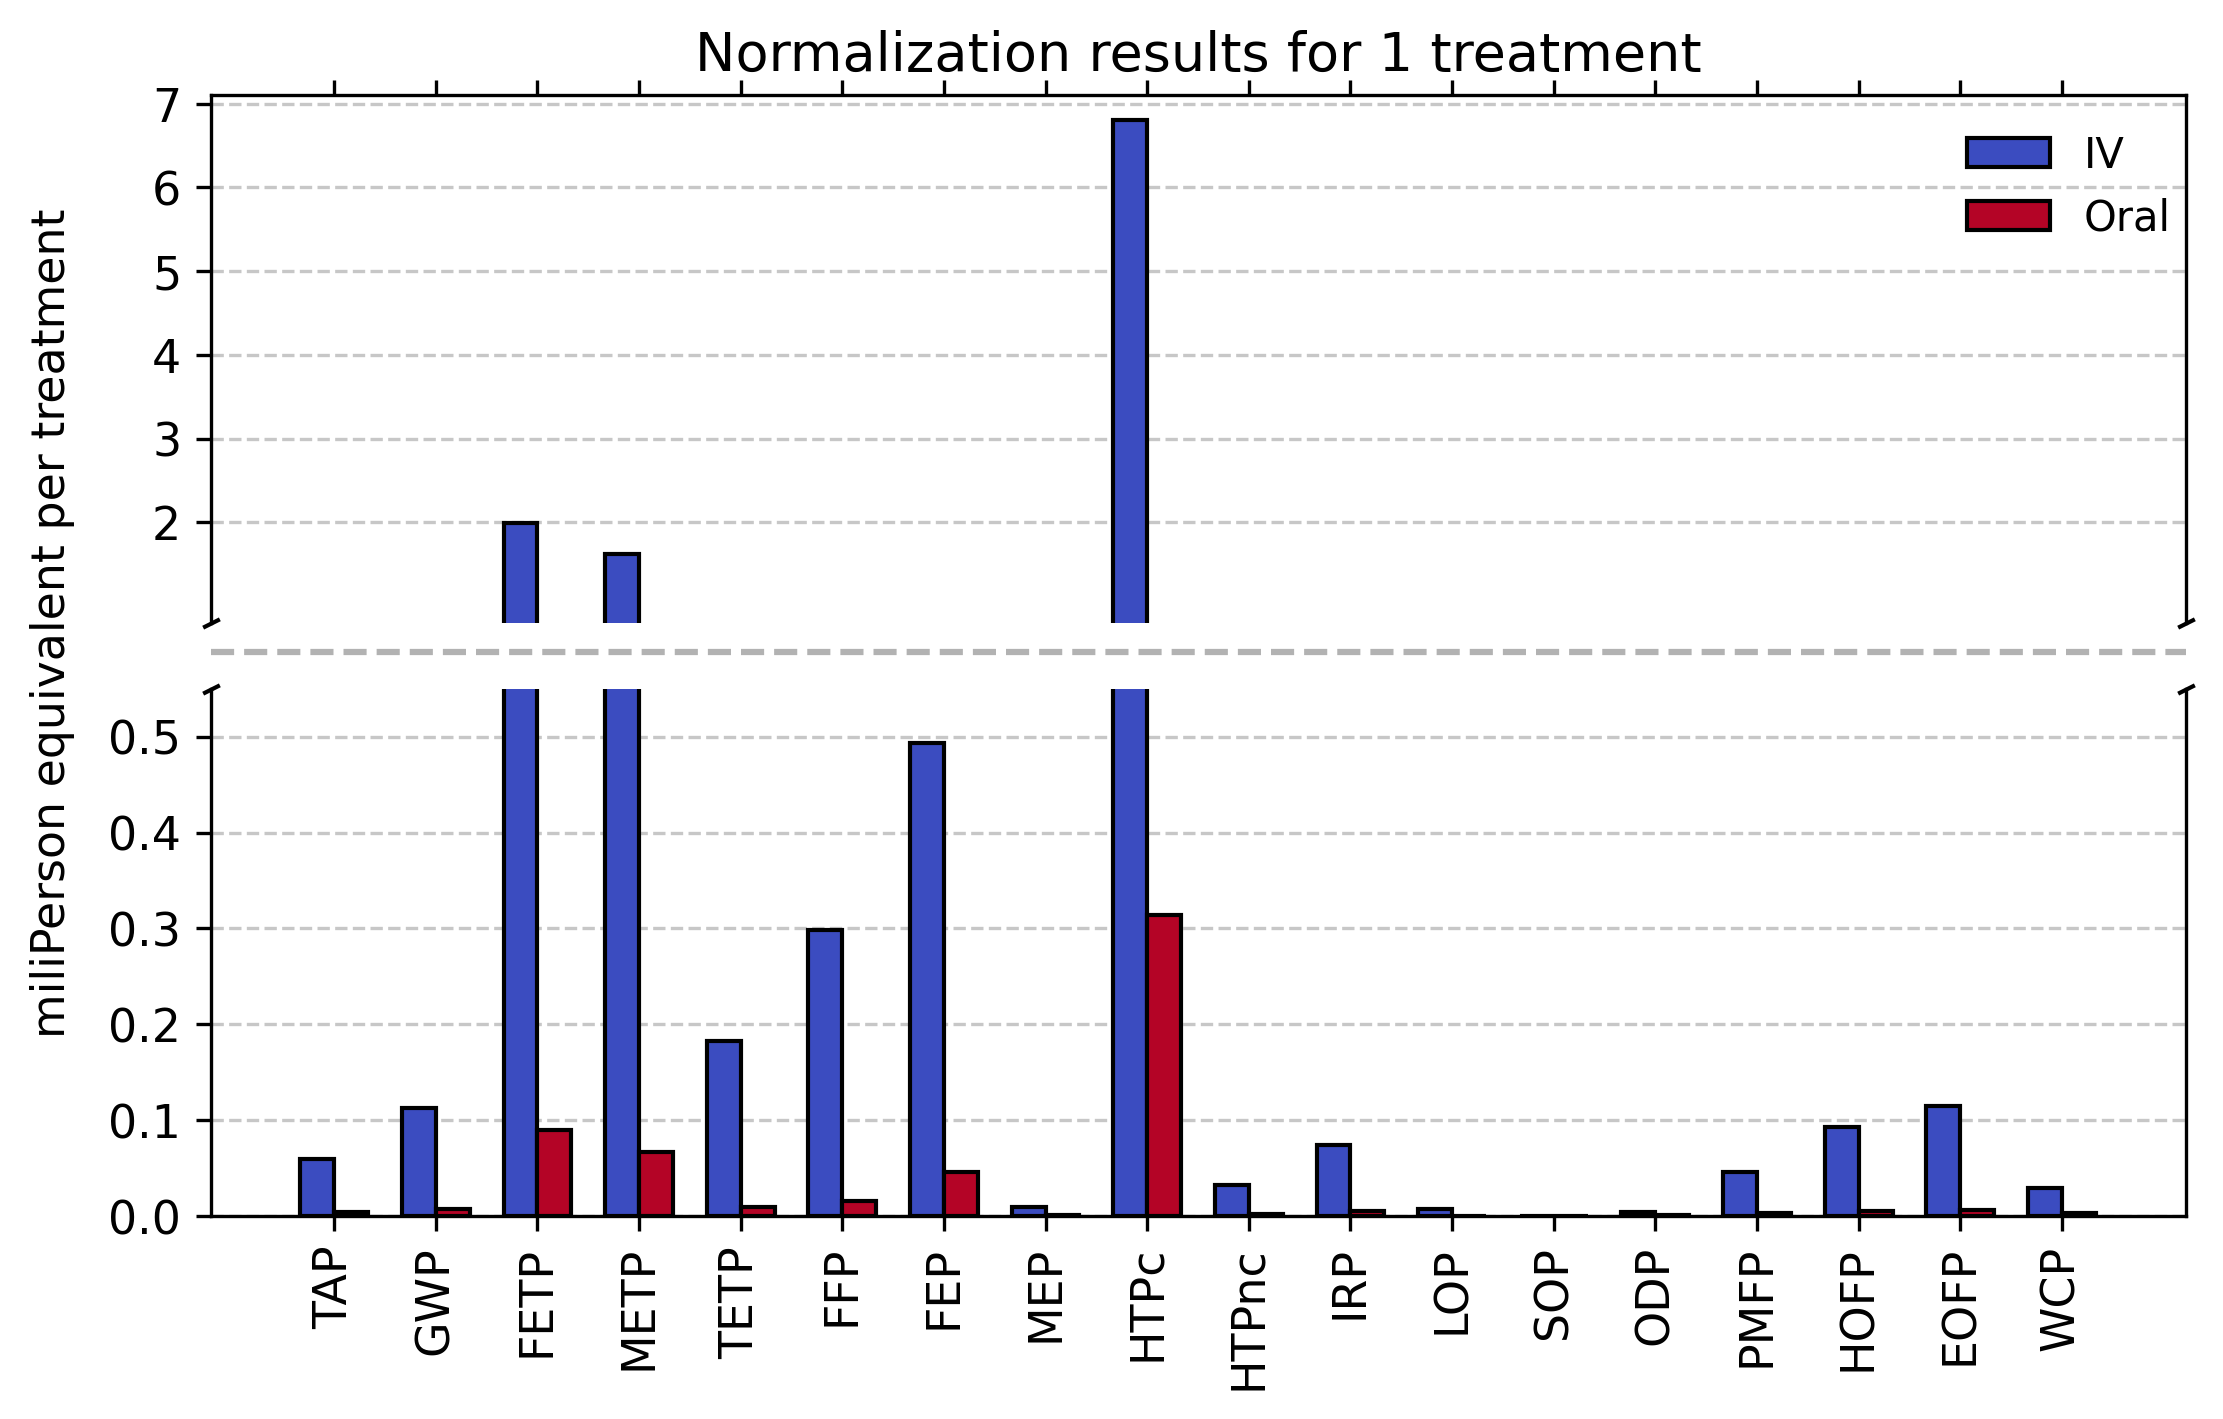

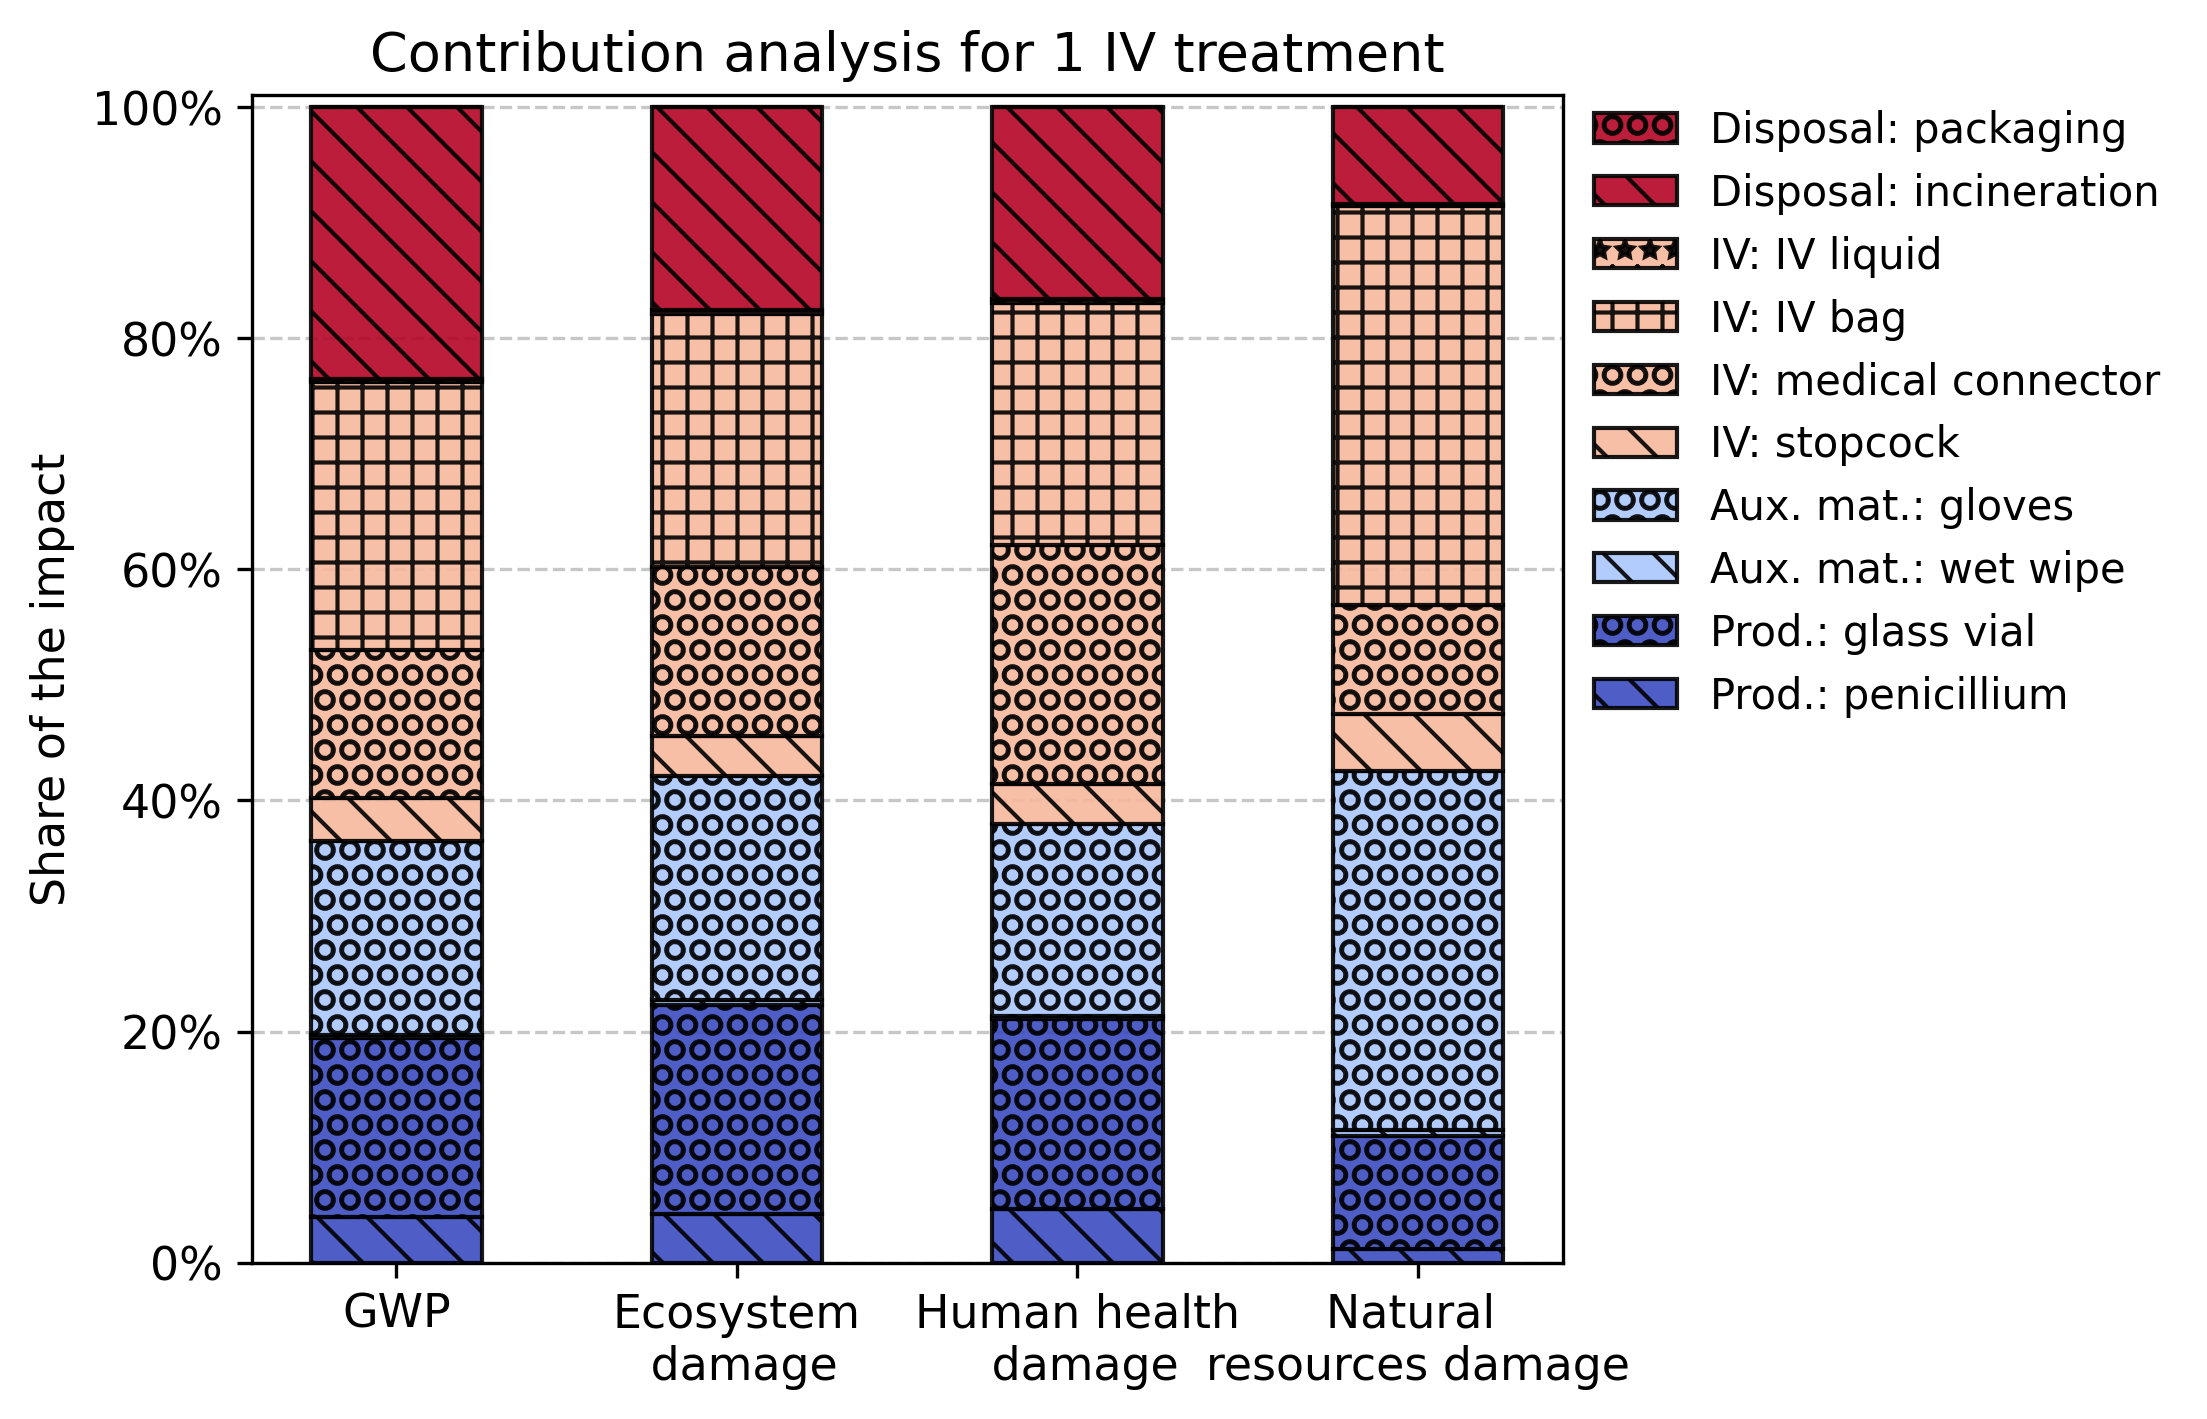

In [193]:
rl.reload_lib([m, rfig, st, stc, eol])

calc = False
reload = False
sensitivty = False


data = rfig.create_results_figures(calc=calc, reload=reload) # Calculating the results and creating the figures
# st.perform_sens_uncert_analysis(mc_base=10, mc_power=5, reload=reload, calc=calc, sensitivty=sensitivty)
if calc:
    init = m.main(path, matching_database)
    init.create_LCI_tables()
